# Softmax Regression PyTorch with MNIST
- **Task**: Classification
- **Data**: MNIST Dataset
- **Model**: Softmax Regression
- **Loss function**: Cross Entropy Loss
- **Optimization**: Stochastic Gradient Descent

In [15]:
%load_ext watermark
%watermark -a 'Nguyen Van Sy Thinh' -v -p torch

Author: Nguyen Van Sy Thinh

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

torch: 2.3.0+cu121



## 1. Import Library

In [2]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import time

## 2. Data

### 2.1. MNIST Dataset

In [3]:
# Loading training data
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
# Loading test data
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15862374.27it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 481279.70it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4422819.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3992984.44it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### 2.2. Data Information

In [4]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 60000
Number of testing samples: 10000


In [5]:
print(f"Datatype of the 1st training sample: {train_dataset[0][0].type()}")
print(f"Size of the 1st training sample: {train_dataset[0][0].size()}")

Datatype of the 1st training sample: torch.FloatTensor
Size of the 1st training sample: torch.Size([1, 28, 28])


### 2.3. Data Visualization

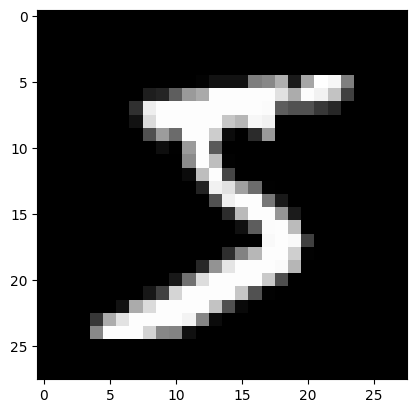

In [6]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()

### 2.4. Load Dataset into DataLoader

In [7]:
from torch.utils.data import DataLoader

# Load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

## 3. Model

In [8]:
import torch
import torch.nn as nn

class SoftmaxRegressionModel(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        output = self.linear(x)
        return output

In [9]:
N_INPUTS = 28*28 # makes a 1D vector of 784
N_OUTPUTS = 10

In [11]:
model = SoftmaxRegressionModel(n_inputs=N_INPUTS, n_outputs=N_OUTPUTS)

## 4. Loss Function and Optimization

In [12]:
LR = 0.001
EPOCHS = 50

In [13]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

## 5. Train

In [16]:
losses = []
accs = []
for epoch in range(EPOCHS):
    start_time = time.time()
    # Train
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    losses.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = model(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / len(test_dataset)
    accs.append(accuracy)
    print(f'[{epoch + 1}/{EPOCHS}] Epoch, Loss {loss.item():.4f}, Accuracy {accuracy:.4f}, Time: {time.time() - start_time:.4f}s')

[1/50] Epoch, Loss 1.1627, Accuracy 80.4500, Time: 12.6259s
[2/50] Epoch, Loss 1.0198, Accuracy 83.8200, Time: 9.0285s
[3/50] Epoch, Loss 0.7184, Accuracy 85.1300, Time: 8.2322s
[4/50] Epoch, Loss 0.5811, Accuracy 86.1800, Time: 8.4397s
[5/50] Epoch, Loss 0.6802, Accuracy 86.9600, Time: 8.7937s
[6/50] Epoch, Loss 0.8986, Accuracy 87.4100, Time: 8.7303s
[7/50] Epoch, Loss 0.4496, Accuracy 87.7500, Time: 8.0176s
[8/50] Epoch, Loss 0.4439, Accuracy 87.9700, Time: 8.8434s
[9/50] Epoch, Loss 0.6221, Accuracy 88.1300, Time: 8.9268s
[10/50] Epoch, Loss 0.4692, Accuracy 88.3900, Time: 8.1867s
[11/50] Epoch, Loss 0.3726, Accuracy 88.5100, Time: 8.7819s
[12/50] Epoch, Loss 0.5051, Accuracy 88.6900, Time: 9.6966s
[13/50] Epoch, Loss 0.3861, Accuracy 88.8300, Time: 8.8526s
[14/50] Epoch, Loss 0.3735, Accuracy 88.9900, Time: 8.1104s
[15/50] Epoch, Loss 0.3313, Accuracy 89.1200, Time: 8.8381s
[16/50] Epoch, Loss 0.4876, Accuracy 89.3100, Time: 8.8599s
[17/50] Epoch, Loss 0.4023, Accuracy 89.4200, Ti

## 6. Inference

### 6.1. Loss Visualization

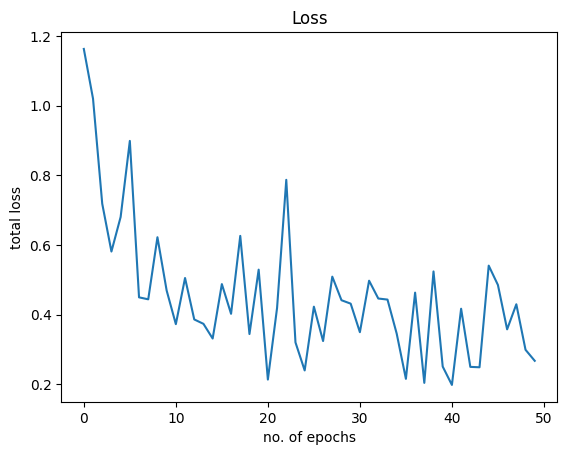

In [17]:
plt.plot(losses)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

### 6.2. Accuracy

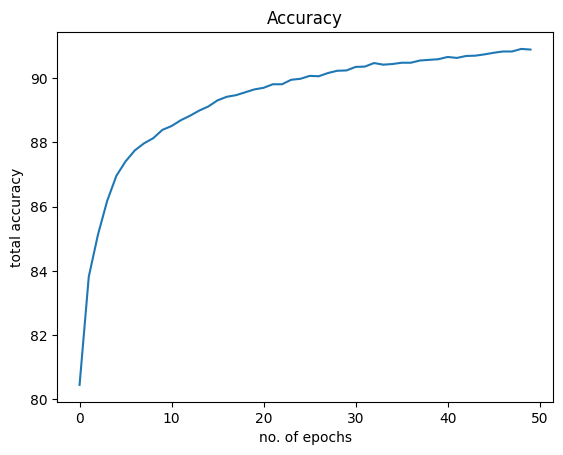

In [18]:
plt.plot(accs)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

## 7. Conclusion
- **Accuracy**: 90.91%